# Data Cleaning and Feature Engineering

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import warnings

In [65]:
warnings.filterwarnings('ignore')

In [66]:
raw_train = pd.read_csv('./datasets/train.csv')
raw_test = pd.read_csv('./datasets/test.csv')

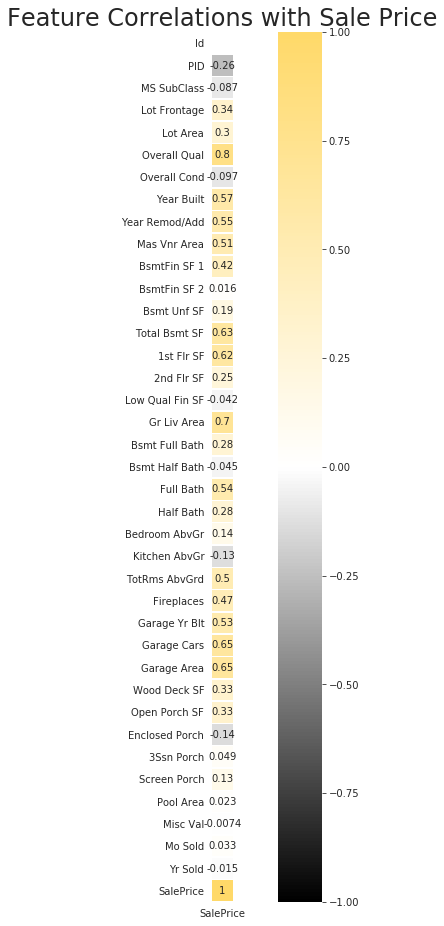

In [67]:
# https://git.generalassemb.ly/DSI-US-12/2.02b-lesson-principles-of-data-visualization-part2/blob/master/solution-code/solution-code.ipynb
# visualize correlations with SalePrice

plt.figure(figsize=(16, 16))

corr = raw_train.corr()

corr = pd.DataFrame(corr['SalePrice'])

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap = clrs.LinearSegmentedColormap.from_list('', ['k', 'w', '#ffd969']))
    
plt.title('Feature Correlations with Sale Price', fontsize = 24);

## Dummify, variable manipulation - mod01

In [68]:
# Add 100% complete numeric, continuous variables from raw datasets
train = raw_train[['Id','PID','Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add',
                  '1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Full Bath','Half Bath',
                  'Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Wood Deck SF','Open Porch SF',
                  'Enclosed Porch','3Ssn Porch','Misc Val', 'SalePrice']]
test = raw_test[['Id','PID','Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add',
                  '1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Full Bath','Half Bath',
                  'Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Wood Deck SF','Open Porch SF',
                  'Enclosed Porch','3Ssn Porch','Misc Val']]


In [69]:
# convert MS Subclass to string before dummifying
train['MS SubClass'] = raw_train['MS SubClass'].astype(str)
train['Mo Sold'] = raw_train['Mo Sold'].astype(str)
train['Yr Sold'] = raw_train['Yr Sold'].astype(str)

test['MS SubClass'] = raw_test['MS SubClass'].astype(str)
test['Mo Sold'] = raw_test['Mo Sold'].astype(str)
test['Yr Sold'] = raw_test['Yr Sold'].astype(str)

In [70]:
# Add 100% categorical variables that only need to be dummified
train[['Yr Sold','Mo Sold','MS SubClass','MS Zoning','Street','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope',
       'Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style',
       'Roof Matl','Exterior 1st','Exterior 2nd','Foundation','Heating','Central Air',
       'Sale Type']] = raw_train[['Yr Sold','Mo Sold','MS SubClass','MS Zoning','Street','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope',
       'Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style',
       'Roof Matl','Exterior 1st','Exterior 2nd','Foundation','Heating','Central Air',
       'Sale Type']]

test[['Yr Sold','Mo Sold','MS SubClass','MS Zoning','Street','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope',
       'Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style',
       'Roof Matl','Exterior 1st','Exterior 2nd','Foundation','Heating','Central Air',
       'Sale Type']] = raw_test[['Yr Sold','Mo Sold','MS SubClass','MS Zoning','Street','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope',
       'Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style',
       'Roof Matl','Exterior 1st','Exterior 2nd','Foundation','Heating','Central Air',
       'Sale Type']]

In [71]:
# concatenate train and test datasets together, dummify, then separate; this way train
# and test maintain the same column number and order
temp_df = pd.concat([train, test], ignore_index=True)


In [72]:
# dummify vars
to_dummy = ['Yr Sold','Mo Sold','MS SubClass','MS Zoning','Street','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope',
       'Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style',
       'Roof Matl','Exterior 1st','Exterior 2nd','Foundation','Heating','Central Air',
       'Sale Type']

temp_df = pd.get_dummies(temp_df, columns=to_dummy, drop_first=True)


In [73]:
# resplit train and test
train = temp_df.loc[temp_df['SalePrice'].notna()]
test = temp_df.loc[temp_df['SalePrice'].isna()]


In [74]:
print(train.shape)
print(test.shape)

(2051, 190)
(878, 190)


In [75]:
# save out modified datasets
train.to_csv(f'./datasets/train_mod01.csv', index=False)
test.to_csv(f'./datasets/test_mod01.csv', index=False)

## Replacing NaNs, futher variable manipulation - mod02

In [76]:
raw_train = pd.read_csv('./datasets/train.csv')
raw_test = pd.read_csv('./datasets/test.csv')

train = pd.read_csv('./datasets/train_mod01.csv')
test = pd.read_csv('./datasets/test_mod01.csv')

In [77]:
# change categorical vars to ordinal
train['Exter Qual'] = raw_train['Exter Qual'].map(lambda x: 4 if x=='Ex' else (3 if x=='Gd' else (2 if x=='Ta' else 1)))
train['Exter Cond'] = raw_train['Exter Cond'].map(lambda x: 4 if x=='Ex' else (3 if x=='Gd' else (2 if x=='Ta' else (1 if x=='Fa' else 0))))
train['Heating QC'] = raw_train['Heating QC'].map(lambda x: 4 if x=='Ex' else (3 if x=='Gd' else (2 if x=='Ta' else 1)))
train['Kitchen Qual'] = raw_train['Kitchen Qual'].map(lambda x: 4 if x=='Ex' else (3 if x=='Gd' else (2 if x=='Ta' else 1)))
train['Functional'] = raw_train['Functional'].map(lambda x: 7 if x=='Typ' else (6 if x=='Min1' else (5 if x=='Maj2' else (4 if x=='Mod' else (3 if x=='Maj1' else (2 if x=='Maj2' else (1 if x=='Sev' else 0)))))))

test['Exter Qual'] = raw_test['Exter Qual'].map(lambda x: 4 if x=='Ex' else (3 if x=='Gd' else (2 if x=='Ta' else 1)))
test['Exter Cond'] = raw_test['Exter Cond'].map(lambda x: 4 if x=='Ex' else (3 if x=='Gd' else (2 if x=='Ta' else (1 if x=='Fa' else 0))))
test['Heating QC'] = raw_test['Heating QC'].map(lambda x: 4 if x=='Ex' else (3 if x=='Gd' else (2 if x=='Ta' else 1)))
test['Kitchen Qual'] = raw_test['Kitchen Qual'].map(lambda x: 4 if x=='Ex' else (3 if x=='Gd' else (2 if x=='Ta' else 1)))
test['Functional'] = raw_test['Functional'].map(lambda x: 7 if x=='Typ' else (6 if x=='Min1' else (5 if x=='Maj2' else (4 if x=='Mod' else (3 if x=='Maj1' else (2 if x=='Maj2' else (1 if x=='Sev' else 0)))))))


In [78]:
# to ordinal
train['Bsmt Qual'] = raw_train['Bsmt Qual'].fillna('None').map(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='Ta' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['Bsmt Cond'] = raw_train['Bsmt Cond'].fillna('None').map(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='Ta' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
train['Bsmt Exposure'] = raw_train['Bsmt Exposure'].fillna('None').map(lambda x: 4 if x=='Gd' else (3 if x=='Av' else (2 if x=='Mn' else (1 if x=='No' else 0))))
train['Garage Finish'] = raw_train['Garage Finish'].fillna('None').map(lambda x: 3 if x=='Fin' else (2 if x=='RFn' else (1 if x=='Unf' else 0)))
train['Electrical'] = raw_train['Electrical'].map(lambda x: 4 if x=='SBrkr' else (3 if x=='FuseA' else (2 if x=='FuseF' else (1 if x=='FuseP' else 0))))

# replace NaNs, to continuous
train['Bsmt Full Bath'] = raw_train['Bsmt Full Bath'].fillna(0)
train['Bsmt Half Bath'] = raw_train['Bsmt Half Bath'].fillna(0)
train['BsmtFin SF 1'] = raw_train['BsmtFin SF 1'].fillna(0)
train['Bsmt Unf SF'] = raw_train['Bsmt Unf SF'].fillna(0)
train['BsmtFin SF 2'] = raw_train['BsmtFin SF 2'].fillna(0)
train['Total Bsmt SF'] = raw_train['Total Bsmt SF'].fillna(0)
train['Garage Cars'] = raw_train['Garage Cars'].fillna(0)
train['Garage Area'] = raw_train['Garage Area'].fillna(0)
train['Garage Yr Blt'] = raw_train['Garage Yr Blt'].fillna(raw_train['Year Built'])
train['Lot Frontage'] = raw_train['Lot Frontage'].fillna(np.sqrt(raw_train['Lot Area']))
train['Mas Vnr Area'] = raw_train['Mas Vnr Area'].fillna(0)                                                
                                 
# to boolean
train['Fence'] = raw_train['Fence'].fillna('None').map(lambda x: 0 if x=='None' else 1)
train['Alley'] = raw_train['Alley'].fillna('None').map(lambda x: 0 if x=='None' else 1)
train['Paved Drive'] = raw_train['Paved Drive'].map(lambda x: 1 if x=='Y' else 0)
train['Pool Area'] = raw_train['Pool Area'].map(lambda x: 1 if x!=0 else 0)

# to ordinal
test['Bsmt Qual'] = raw_test['Bsmt Qual'].fillna('None').map(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='Ta' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
test['Bsmt Cond'] = raw_test['Bsmt Cond'].fillna('None').map(lambda x: 5 if x=='Ex' else (4 if x=='Gd' else (3 if x=='Ta' else (2 if x=='Fa' else (1 if x=='Po' else 0)))))
test['Bsmt Exposure'] = raw_test['Bsmt Exposure'].fillna('None').map(lambda x: 4 if x=='Gd' else (3 if x=='Av' else (2 if x=='Mn' else (1 if x=='No' else 0))))
test['Garage Finish'] = raw_test['Garage Finish'].fillna('None').map(lambda x: 3 if x=='Fin' else (2 if x=='RFn' else (1 if x=='Unf' else 0)))
test['Electrical'] = raw_test['Electrical'].map(lambda x: 4 if x=='SBrkr' else (3 if x=='FuseA' else (2 if x=='FuseF' else (1 if x=='FuseP' else 0))))

# replace NaNs, to continuous
test['Bsmt Full Bath'] = raw_test['Bsmt Full Bath'].fillna(0)
test['Bsmt Half Bath'] = raw_test['Bsmt Half Bath'].fillna(0)
test['BsmtFin SF 1'] = raw_test['BsmtFin SF 1'].fillna(0)
test['Bsmt Unf SF'] = raw_test['Bsmt Unf SF'].fillna(0)
test['BsmtFin SF 2'] = raw_test['BsmtFin SF 2'].fillna(0)
test['Total Bsmt SF'] = raw_test['Total Bsmt SF'].fillna(0)
test['Garage Cars'] = raw_test['Garage Cars'].fillna(0)
test['Garage Area'] = raw_test['Garage Area'].fillna(0)
test['Garage Yr Blt'] = raw_test['Garage Yr Blt'].fillna(raw_train['Year Built'])
# coarse way of estimating missing lot frontage values, consider improving
test['Lot Frontage'] = raw_test['Lot Frontage'].fillna(np.sqrt(raw_train['Lot Area']))
test['Mas Vnr Area'] = raw_test['Mas Vnr Area'].fillna(0)                                                
                                 
# to boolean
test['Fence'] = raw_test['Fence'].fillna('None').map(lambda x: 0 if x=='None' else 1)
test['Alley'] = raw_test['Alley'].fillna('None').map(lambda x: 0 if x=='None' else 1)
test['Paved Drive'] = raw_test['Paved Drive'].map(lambda x: 1 if x=='Y' else 0)
test['Pool Area'] = raw_test['Pool Area'].map(lambda x: 1 if x!=0 else 0)
  

In [79]:
# to categorical
train['Garage Type']=raw_train['Garage Type'].fillna('None')
train['Mas Vnr Type']=raw_train['Mas Vnr Type'].fillna('None')
train['BsmtFin Type 1']=raw_train['BsmtFin Type 1'].fillna('None')
train['Fireplace Qu']=raw_train['Fireplace Qu'].fillna('None')
train['Garage Finish']=raw_train['Garage Finish'].fillna('None')

# to categorical
test['Garage Type']=raw_test['Garage Type'].fillna('None')
test['Mas Vnr Type']=raw_test['Mas Vnr Type'].fillna('None')
test['BsmtFin Type 1']=raw_test['BsmtFin Type 1'].fillna('None')
test['Fireplace Qu']=raw_test['Fireplace Qu'].fillna('None')
test['Garage Finish']=raw_test['Garage Finish'].fillna('None')

In [80]:
# from year built to time since
train['Year Built'] = 2010 - train['Year Built']
train['Year Remod/Add'] = 2010 - train['Year Remod/Add']
train['Garage Yr Blt'] = 2010 - train['Garage Yr Blt']

test['Year Built'] = 2010 - test['Year Built']
test['Year Remod/Add'] = 2010 - test['Year Remod/Add']
test['Garage Yr Blt'] = 2010 - test['Garage Yr Blt']

In [81]:
# dummify vars once NaNs have been replaced
temp_df = pd.concat([train, test], ignore_index=True)

to_dummy = ['Garage Type', 'Mas Vnr Type', 'BsmtFin Type 1', 'Fireplace Qu', 'Garage Finish']

temp_df = pd.get_dummies(temp_df, columns=to_dummy, drop_first=True)

train = temp_df.loc[temp_df['SalePrice'].notna()]
test = temp_df.loc[temp_df['SalePrice'].isna()]

In [82]:
print(train.shape)
print(test.shape)

(2051, 238)
(878, 238)


In [83]:
# save out modified datasets
train.to_csv(f'./datasets/train_mod02.csv', index=False)
test.to_csv(f'./datasets/test_mod02.csv', index=False)

## Creating polynomial vars

In [84]:
train = pd.read_csv('./datasets/train_mod02.csv')
test = pd.read_csv('./datasets/test_mod02.csv')

In [85]:
# find and return non-bool columns in df
def non_bool_cols(data_frame):
    bool_cols = [col for col in data_frame if np.isin(data_frame[col].dropna().unique(), [0, 1]).all()]
    return [col for col in data_frame.columns if col not in bool_cols]

In [86]:
# create train and test dataframes with only vars that will be turned into polynomials
non_bool_train = non_bool_cols(train)
non_bool_train.remove('Id')
non_bool_train.remove('PID')
non_bool_train.remove('SalePrice')

non_bool_test = non_bool_cols(train)
non_bool_test.remove('Id')
non_bool_test.remove('PID')
non_bool_test.remove('SalePrice')

to_poly_train = train[non_bool_train]
to_poly_test = test[non_bool_test]

In [87]:
# create polynomial dataframs
poly_train = PolynomialFeatures(include_bias=False)
X_poly_train = poly_train.fit_transform(to_poly_train)
poly_df_train = pd.DataFrame(X_poly_train, columns=poly_train.get_feature_names(non_bool_train))

poly_test = PolynomialFeatures(include_bias=False)
X_poly_test = poly_test.fit_transform(to_poly_test)
poly_df_test = pd.DataFrame(X_poly_test, columns=poly_test.get_feature_names(non_bool_test))

In [88]:
# merge polynomial dataframes with original
cols_to_use_train = train.columns.difference(poly_df_train.columns)
train = pd.merge(poly_df_train, train[cols_to_use_train], left_index=True, right_index=True, how='outer')

cols_to_use_test = test.columns.difference(poly_df_test.columns)
test = pd.merge(poly_df_test, test[cols_to_use_test], left_index=True, right_index=True, how='outer')

# create placeholder test SalePrice col
test['SalePrice'] = test['SalePrice'].map(lambda x: np.NaN)

In [89]:
print(train.shape)
print(test.shape)

(2051, 1058)
(878, 1058)


In [90]:
# save out modified datasets
train.to_csv(f'./datasets/train_mod03.csv', index=False)
test.to_csv(f'./datasets/test_mod03.csv', index=False)

## Removing outliers - mod04

In [91]:
train = pd.read_csv('./datasets/train_mod02.csv')

In [92]:
# identify outliers by their euclidean distance apart in 2d space
def two_d_outlier(series1, series2):

    points = []
    series1 = series1.tolist()
    series2 = series2.tolist()
    mean_nearest_points_dist = []

    for element in range(len(series1)):
        points.append([series1[element], series2[element]])

    # inefficent, try to improve via vectorization?
    for point in range(len(points)):
        distances = []
        for point2 in range(len(points)):
            # create list of lists of the distance of each point from every other point
            distances.append(np.sqrt(((points[point2][0] - points[point][0])**2) + ((points[point2][1] - points[point][1])**2)))

        #mean_nearest_points_dist.append(np.mean(sorted(distances)[1:2]))
        mean_nearest_points_dist.append(sorted(distances)[1])
        
    return mean_nearest_points_dist

In [93]:
# loop outlier detection function on each non-boolean var
# create boolean output_array with same dimensions as df, if outlier then True, if not outlier then False
# **inefficient, need to improve**
var_check_list = []

columns = non_bool_cols(train)
columns.remove('Id')
columns.remove('PID')
columns.remove('SalePrice')

for col in columns:
    ss = StandardScaler()
    Z = ss.fit_transform(train[[col, 'SalePrice']])
    series_a = Z.transpose()[0]
    series_b = Z.transpose()[1]
    nearest_neighbor = two_d_outlier(series_a, series_b)
    # threshold distance to be considered outlier
    threshold = np.mean(nearest_neighbor) + (7 * np.std(nearest_neighbor))
    var_check_list.append([element > threshold for element in nearest_neighbor])
    
output_array = np.array(var_check_list).transpose()

In [94]:
# if row contains at least 1 True, append 1 to outlier binary
outlier_binary = []
for each_list in output_array:
    if True in each_list:
        outlier_binary.append(1)
    else:
        outlier_binary.append(0)

# check number of outliers
np.sum(outlier_binary)

121

In [95]:
# set outlier binary to df column
train['outlier'] = outlier_binary
train = train[train['outlier']==0]
# remove outliers, return shape
train = train.drop(columns='outlier')

In [96]:
print(train.shape)

(1930, 238)


In [97]:
# save out modified dataset
train.to_csv(f'./datasets/train_mod04.csv', index=False)

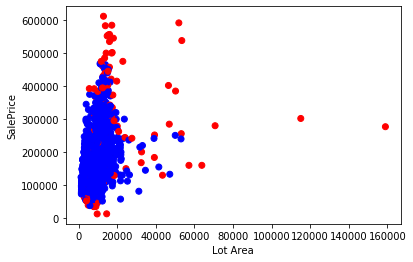

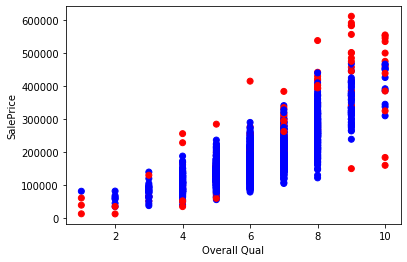

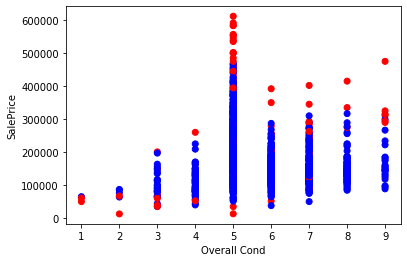

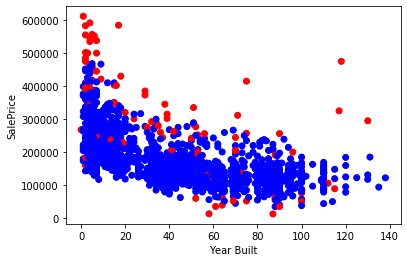

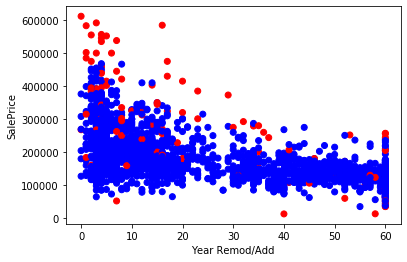

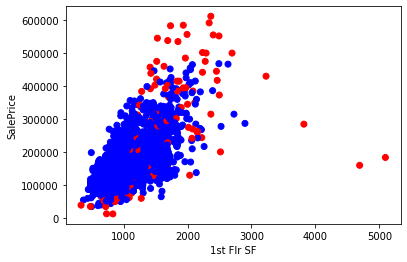

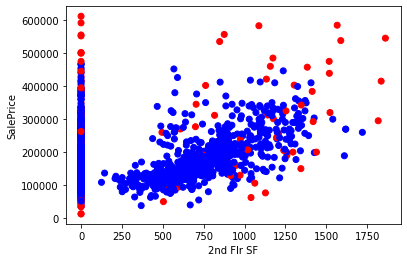

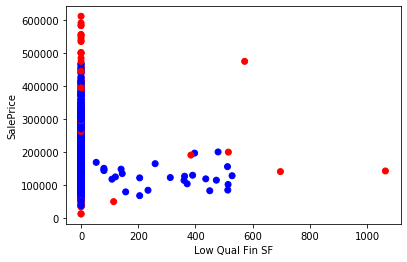

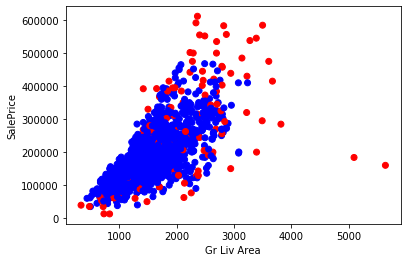

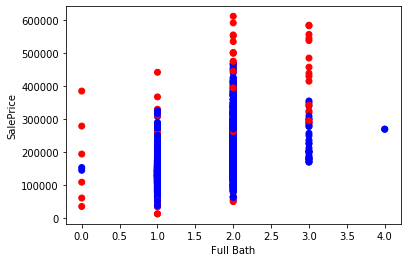

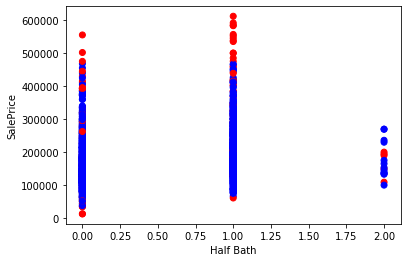

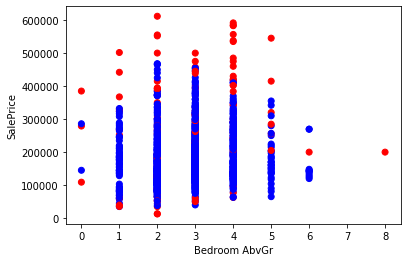

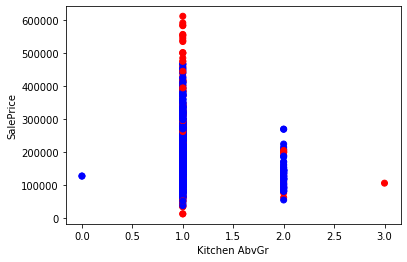

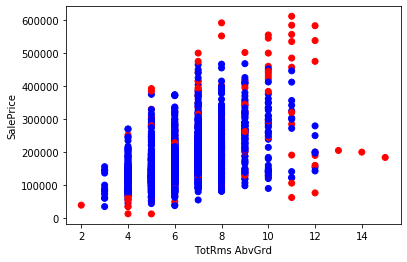

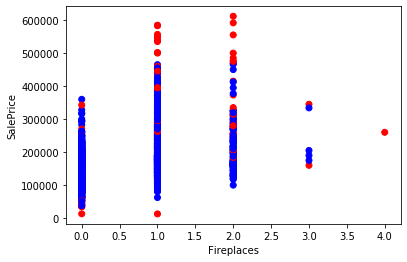

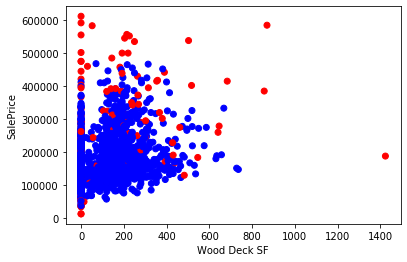

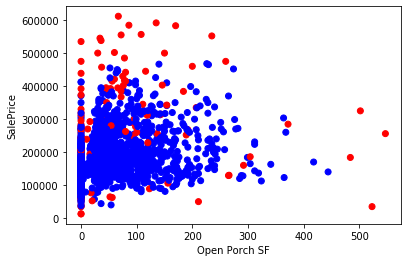

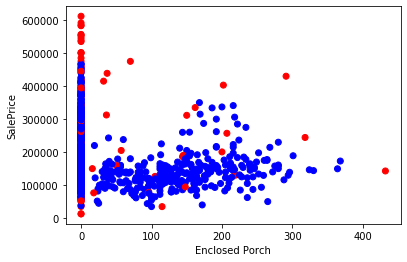

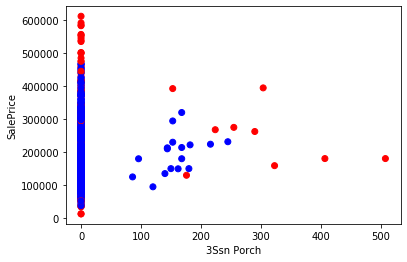

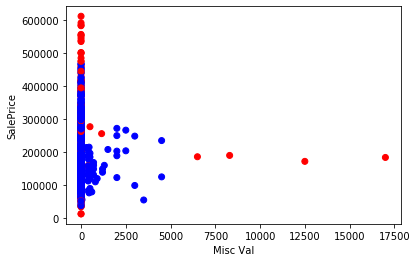

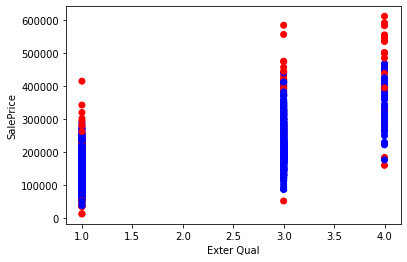

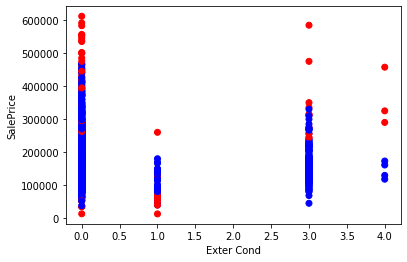

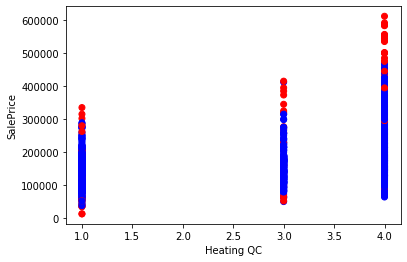

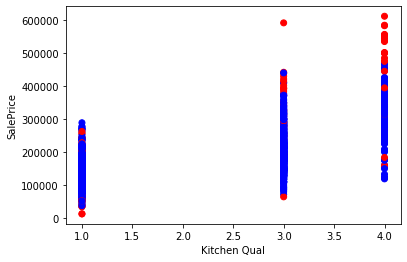

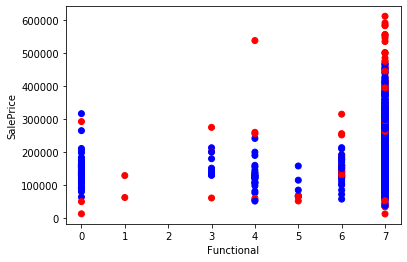

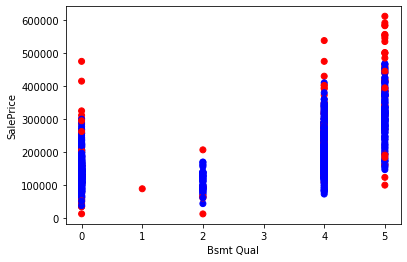

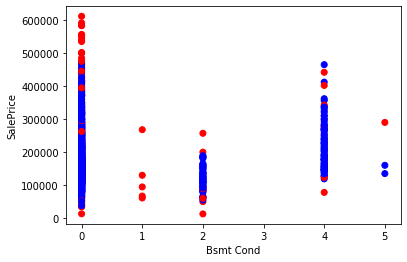

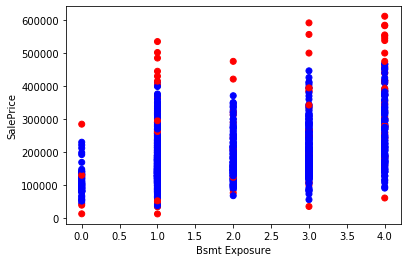

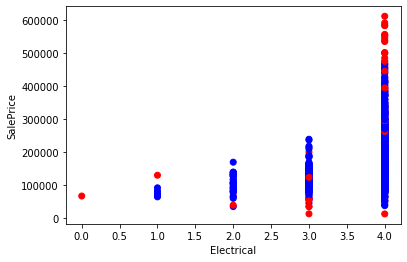

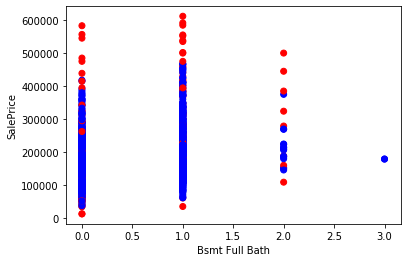

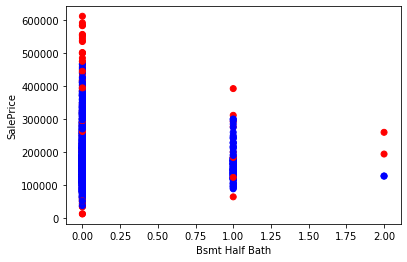

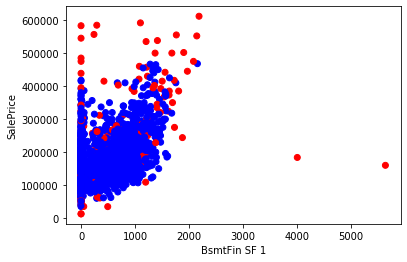

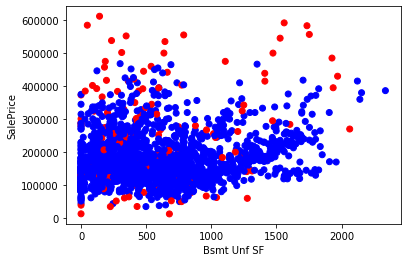

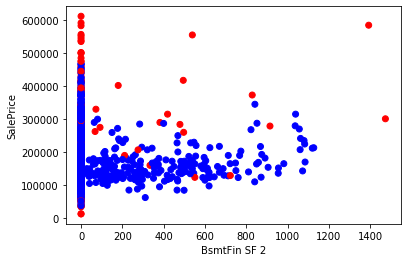

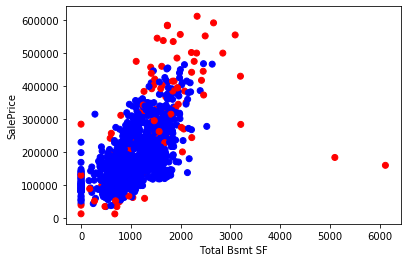

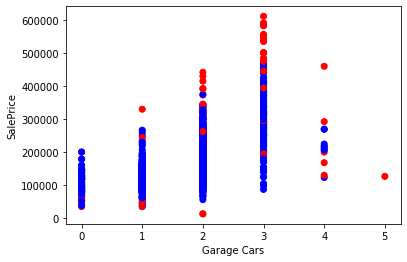

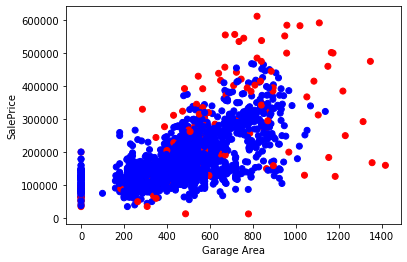

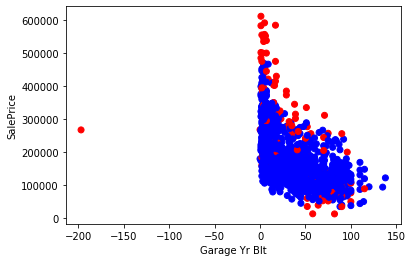

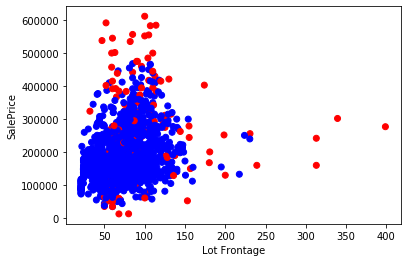

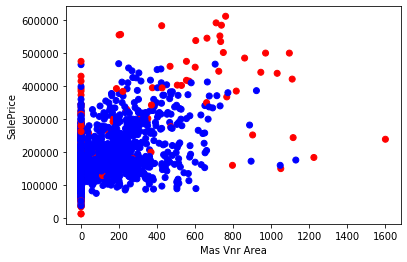

In [98]:
# visualize scatter plot of non_bool features vs SalePrice with removed outliers in red
train = pd.read_csv('./datasets/train_mod02.csv')
temp = pd.DataFrame(outlier_binary, columns=['outlier'])
colors = ['blue', 'red']
for col in columns:
    plt.figure()
    color_series = temp['outlier'].map(lambda s: 'blue' if s == 0 else 'red')
    plt.scatter(train[col], train['SalePrice'], color=color_series)
    plt.xlabel(col)
    plt.ylabel('SalePrice');

## Creating polynomial vars from data w/o outliers - mod05

In [99]:
train = pd.read_csv('./datasets/train_mod04.csv')

In [100]:
# find and return non-bool columns in df
def non_bool_cols(data_frame):
    bool_cols = [col for col in data_frame if np.isin(data_frame[col].dropna().unique(), [0, 1]).all()]
    return [col for col in data_frame.columns if col not in bool_cols]

In [101]:
# create train dataframe with only vars that will be turned into polynomials
non_bool_train = non_bool_cols(train)
non_bool_train.remove('Id')
non_bool_train.remove('PID')
non_bool_train.remove('SalePrice')

to_poly_train = train[non_bool_train]

In [102]:
# create polynomial dataframs
poly_train = PolynomialFeatures(include_bias=False)
X_poly_train = poly_train.fit_transform(to_poly_train)
poly_df_train = pd.DataFrame(X_poly_train, columns=poly_train.get_feature_names(non_bool_train))

In [103]:
# merge polynomial dataframes with original
cols_to_use_train = train.columns.difference(poly_df_train.columns)
train = pd.merge(poly_df_train, train[cols_to_use_train], left_index=True, right_index=True, how='outer')

In [104]:
print(train.shape)

(1930, 1058)


In [105]:
# save out modified dataset
train.to_csv(f'./datasets/train_mod05.csv', index=False)